# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumSquare')
print(plt.rcParams['font.family'])

['NanumSquare']


## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

1) 변수의 비즈니스 의미

> 각 지역 판매량

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [5]:
data["Sales"].isna().sum()

0

4) 가변수화 필요 여부

> 필요하지 않다.

5) 기초통계량(수치화)

In [6]:
data["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

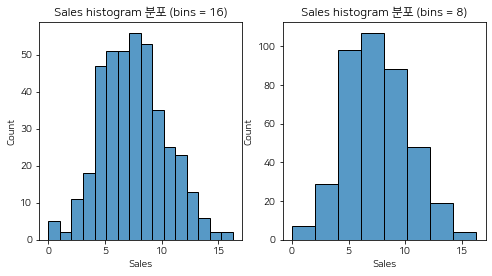

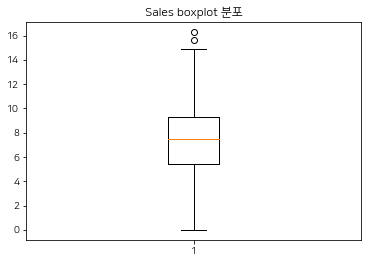

In [45]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data["Sales"], bins = 16)
plt.title("Sales histogram 분포 (bins = 16)")

plt.subplot(1,2,2)
sns.histplot(data["Sales"], bins = 8)
plt.title("Sales histogram 분포 (bins = 8)")
plt.show()

plt.boxplot(data["Sales"])
plt.title("Sales boxplot 분포")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 판매량의 평균은 약 7000개이고, 특히 25% ~ 75%에 많이 몰려있는 것을 보아, 카시트가 5000~9000개 정도가 가장 많이 팔리는 수량이라고 유추할 수 있다. 

8) 추가 분석해 볼 사항이 있나요?

> - 가격에 따라 판매량의 변화가 있는지 파악 
> - 광고 예산에 따라 판매량의 변화가 있는지 파악
> - 지역 평균 소득에 따라 판매량의 변화가 있는지 파악
> - 매장이 미국에 있는지 여부에 따라 판매량의 변화가 있는지 파악 ...

### ② CompPrice

1) 변수의 비즈니스 의미

> 경쟁사 가격

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [27]:
data["CompPrice"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [28]:
data["CompPrice"].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

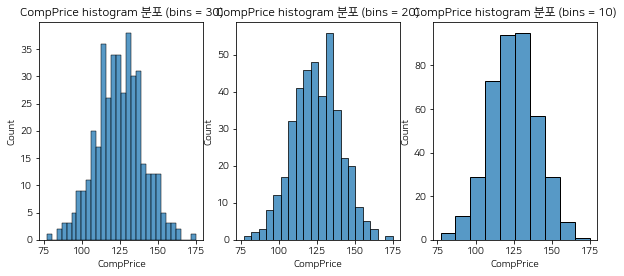

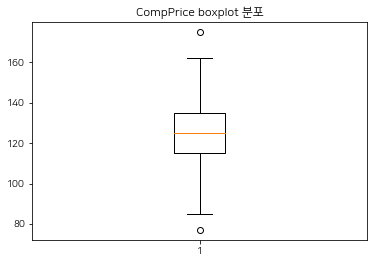

In [42]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.histplot(data["CompPrice"], bins = 30)
plt.title("CompPrice histogram 분포 (bins = 30)")

plt.subplot(1,3,2)
sns.histplot(data["CompPrice"], bins = 20)
plt.title("CompPrice histogram 분포 (bins = 20)")

plt.subplot(1,3,3)
sns.histplot(data["CompPrice"], bins = 10)
plt.title("CompPrice histogram 분포 (bins = 10)")

plt.show()

plt.boxplot(data["CompPrice"])
plt.title("CompPrice boxplot 분포")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 최고가와 최저가의 가격이 차이가 큼
- 낮은 가격대를 파는 경쟁사는 할인행사나 진열상태가 좋지 않은 상품 등이지 않을까 유추함

8) 추가 분석해 볼 사항이 있나요?

> - 경쟁사 가격에 따른 판매량
> - 진열상품의 상태에 따른 경쟁사 가격 현황

### ③ Income

1) 변수의 비즈니스 의미

> 지역 평균 소득

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [34]:
data["Income"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [35]:
data["Income"].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

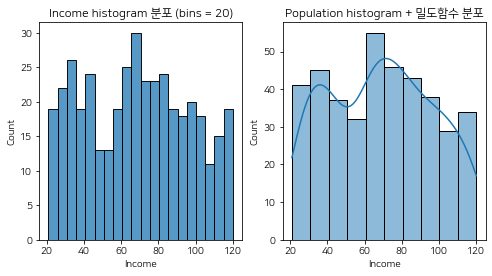

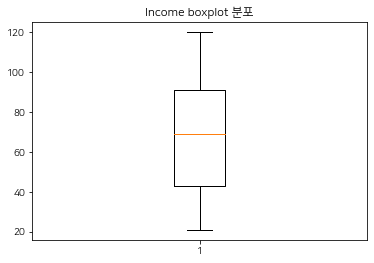

In [110]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data["Income"], bins = 20)
plt.title("Income histogram 분포 (bins = 20)")

plt.subplot(1,2,2)
sns.histplot(data["Income"], kde=True)
plt.title("Population histogram + 밀도함수 분포")
plt.show()

plt.boxplot(data["Income"])
plt.title("Income boxplot 분포")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 50% 정도가 약 7만 정도 소득을 가지고 있음
> - 지역 평균 소득에 비해 카시트는 비싼편인 것 같음

8) 추가 분석해 볼 사항이 있나요?

> - 지역 평균 소득에 따른 판매량

### ④ Advertising

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [46]:
data["Advertising"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [47]:
data["Advertising"].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

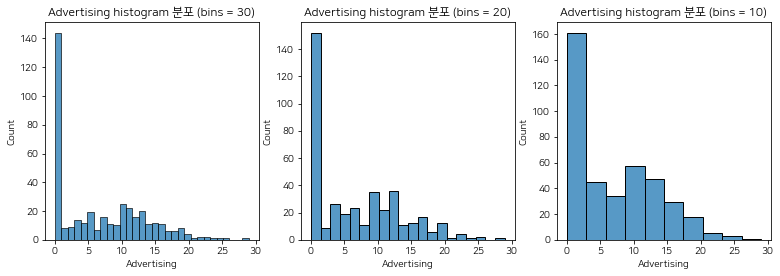

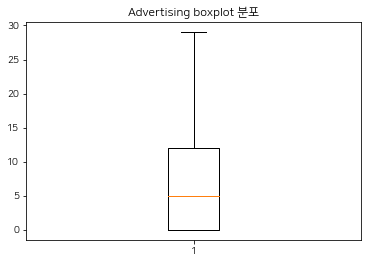

In [53]:
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
sns.histplot(data["Advertising"], bins = 30)
plt.title("Advertising histogram 분포 (bins = 30)")

plt.subplot(1,3,2)
sns.histplot(data["Advertising"], bins = 20)
plt.title("Advertising histogram 분포 (bins = 20)")

plt.subplot(1,3,3)
sns.histplot(data["Advertising"], bins = 10)
plt.title("Advertising histogram 분포 (bins = 10)")

plt.show()

plt.boxplot(data["Advertising"])
plt.title("Advertising boxplot 분포")


plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 약 25% 정도가 광고예산이 0인 것으로 보아, 광고를 하지 않은 것을 알 수 있음.

8) 추가 분석해 볼 사항이 있나요?

> - 광고 유무에 따른 판매량 현황

### ⑤ Population

1) 변수의 비즈니스 의미

> 지역 인구수

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [54]:
data["Population"].isna().sum()

0

4) 가변수화 필요 여부

> 필요없음

5) 기초통계량(수치화)

In [56]:
data["Population"].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

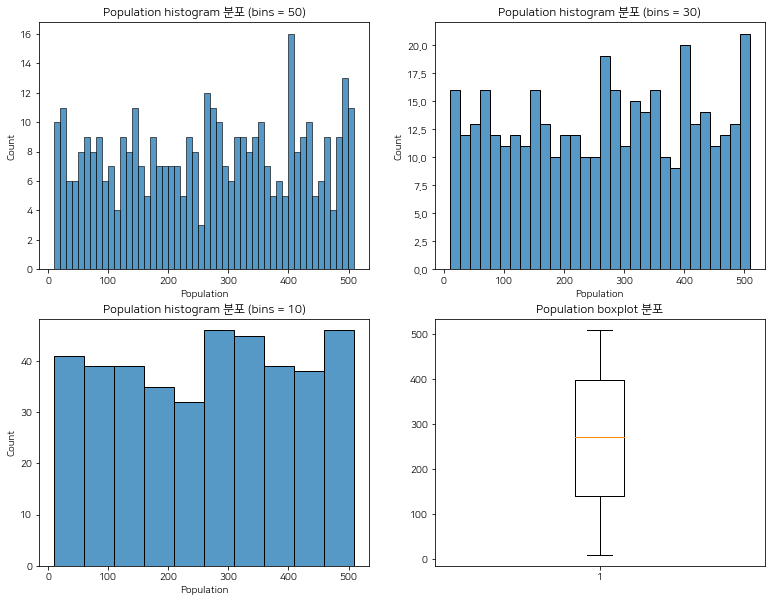

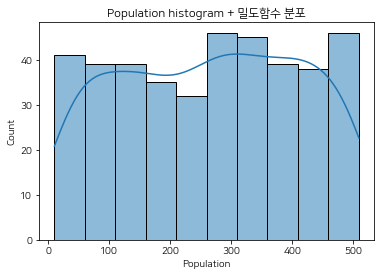

In [108]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.histplot(data["Population"], bins = 50)
plt.title("Population histogram 분포 (bins = 50)")

plt.subplot(2,2,2)
sns.histplot(data["Population"], bins = 30)
plt.title("Population histogram 분포 (bins = 30)")

plt.subplot(2,2,3)
sns.histplot(data["Population"], bins = 10)
plt.title("Population histogram 분포 (bins = 10)")

plt.subplot(2,2,4)
plt.boxplot(data["Population"])
plt.title("Population boxplot 분포")
plt.show()

sns.histplot(data["Population"], kde=True)
plt.title("Population histogram + 밀도함수 분포")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 인구 수의 최대, 최소의 차이가 큼
> - 인구 수가 거의 균등

8) 추가 분석해 볼 사항이 있나요?

> - 인구 수에 따라 범위가 크기 때문에 범위를 나눠서 지역별 카시트 판매량 분석

### ⑥ Price

1) 변수의 비즈니스 의미

> 자사 지역별 판매가격

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [66]:
data["Price"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [67]:
data["Price"].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

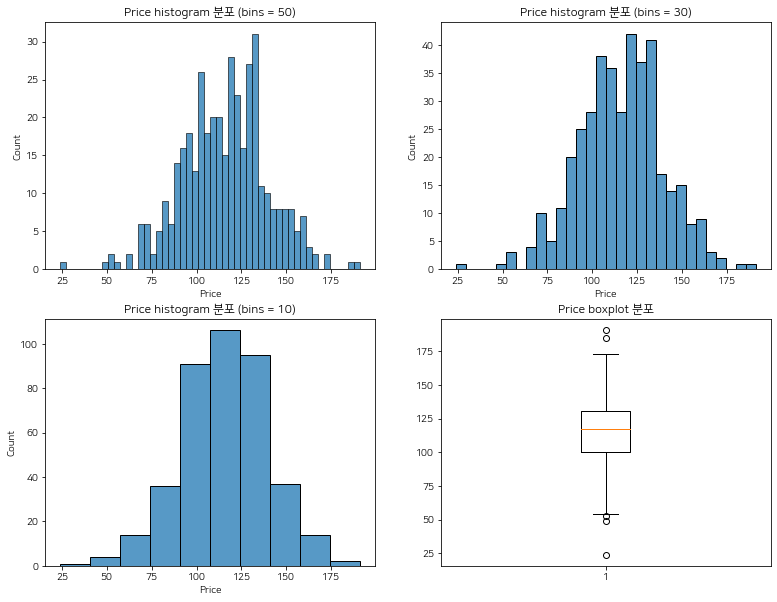

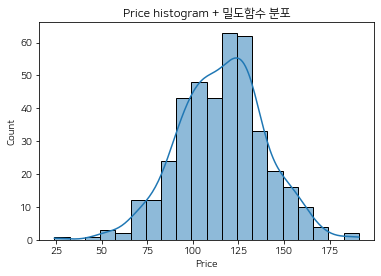

In [107]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.histplot(data["Price"], bins = 50)
plt.title("Price histogram 분포 (bins = 50)")

plt.subplot(2,2,2)
sns.histplot(data["Price"], bins = 30)
plt.title("Price histogram 분포 (bins = 30)")

plt.subplot(2,2,3)
sns.histplot(data["Price"], bins = 10)
plt.title("Price histogram 분포 (bins = 10)")

plt.subplot(2,2,4)
plt.boxplot(data["Price"])
plt.title("Price boxplot 분포")
plt.show()

sns.histplot(data["Price"], kde=True)
plt.title("Price histogram + 밀도함수 분포")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 경쟁사의 최저가는 77000달러이지만, 자사의 최저가는 24000달러이고, 경쟁사의 최고가는 175000달러이지만, 자사의 최고가는 191000달러인 것을 보아, 자사의 판매 가격의 범위가 더 넓은 것으로 파악됨

8) 추가 분석해 볼 사항이 있나요?

> - 지역별 판매 가격에 따른 지역별 평균 소득

### ⑦ ShelveLoc

1) 변수의 비즈니스 의미

> 진열상태

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [69]:
data["ShelveLoc"].isna().sum()

0

4) 가변수화 필요 여부

> 필요함

5) 기초통계량(수치화)

In [71]:
print(data["ShelveLoc"].value_counts())
print(data["ShelveLoc"].value_counts()/len(data["ShelveLoc"]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


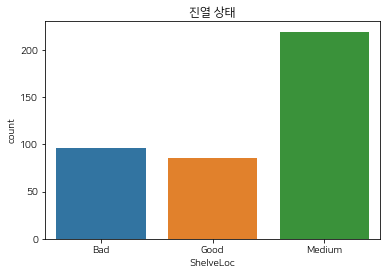

In [103]:
sns.countplot(data["ShelveLoc"])
plt.title("진열 상태")
plt.show()

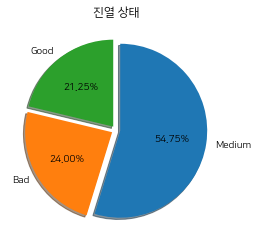

In [84]:
cnt = data["ShelveLoc"].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = "%.2f%%", startangle = 90, counterclock=False, explode = [0.05, 0.05, 0.05], shadow=True)

plt.title("진열 상태")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - Medium이 50% 이상인 것을 보아, 대체적으로 진열 상태는 나쁘지 않은 것 같음

8) 추가 분석해 볼 사항이 있나요?

> - 진열 상태에 따른 판매량
> - 진열 상태에 따른 판매 가격

### ⑧ Age

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [86]:
data["Age"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [87]:
data["Age"].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

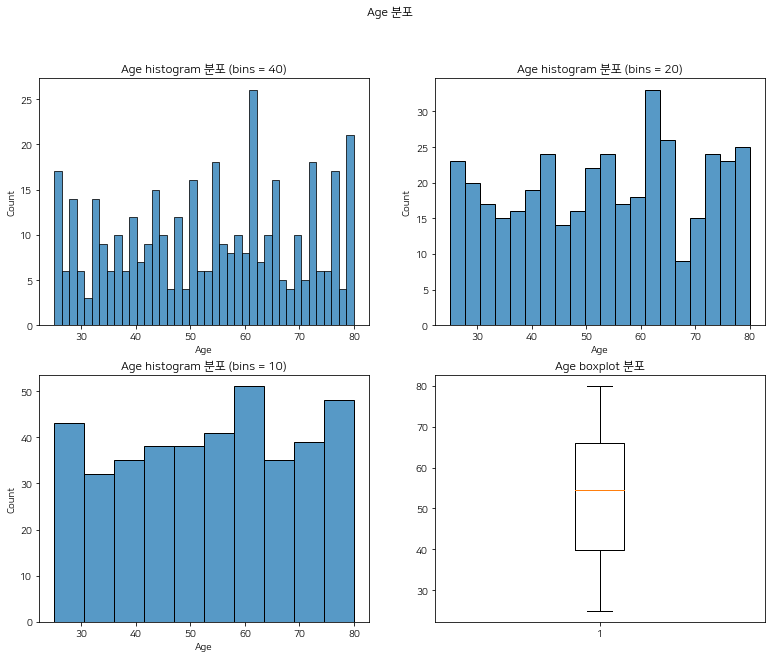

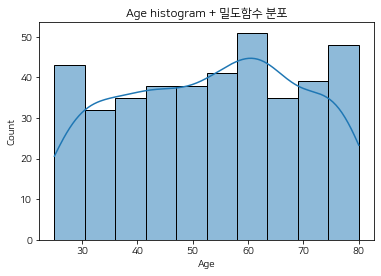

In [106]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.histplot(data["Age"], bins = 40)
plt.title("Age histogram 분포 (bins = 40)")

plt.subplot(2,2,2)
sns.histplot(data["Age"], bins = 20)
plt.title("Age histogram 분포 (bins = 20)")

plt.subplot(2,2,3)
sns.histplot(data["Age"], bins = 10)
plt.title("Age histogram 분포 (bins = 10)")

plt.subplot(2,2,4)
plt.boxplot(data["Age"])
plt.title("Age boxplot 분포")

plt.suptitle("Age 분포")
plt.show()

sns.histplot(data["Age"], kde=True)
plt.title("Age histogram + 밀도함수 분포")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 지역별 평균 연령은 대부분 균등해보임
> - 카시트를 구매하는 주 연령대는 20~40대 부모일 가능성이 높음

8) 추가 분석해 볼 사항이 있나요?

> - 연령의 범위를 나눠서 판매량 비교

### ⑨ Urban

1) 변수의 비즈니스 의미

> - 도심 지역 여부(0,1)

2) 숫자, 범주?

> - 범주

3) NaN 존재 유무 및 조치방안

In [89]:
data["Urban"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [90]:
print(data["Urban"].value_counts())
print(data["Urban"].value_counts()/len(data["Urban"]))

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


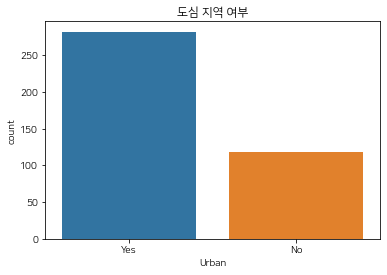

In [99]:
sns.countplot(data["Urban"])
plt.title("도심 지역 여부")
plt.show()

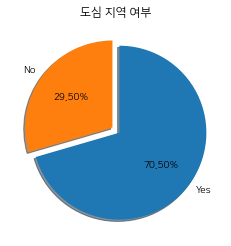

In [92]:
cnt = data["Urban"].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = "%.2f%%", startangle = 90, counterclock=False, explode = [0.05, 0.05], shadow=True)

plt.title("도심 지역 여부")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 도심에 있는 지역이 약 70%로 많은 지역들이 도심에 있다는 것을 파악
> - 도심에 있는 지역들은 인구 수가 많을 것이고, 판매량이 도심 외곽 지역보다 많을 것이라고 유추함

8) 추가 분석해 볼 사항이 있나요?

> - 도심 지역 여부에 따른 판매량
> - 도심 지역 여부에 따른 지역 인구의 평균 연령
> - 도심 지역 여부에 따른 지역별 소득 수준

### ⑩ US

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부(0,1)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [94]:
data["US"].isna().sum()

0

4) 가변수화 필요 여부

> 필요 없음

5) 기초통계량(수치화)

In [95]:
print(data["US"].value_counts())
print(data["US"].value_counts()/len(data["US"]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


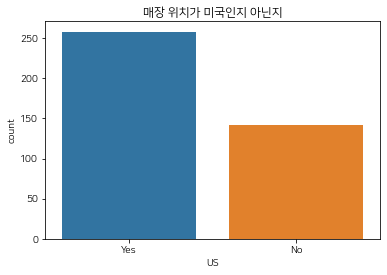

In [98]:
sns.countplot(data["US"])

plt.title("매장 위치가 미국인지 아닌지")
plt.show()

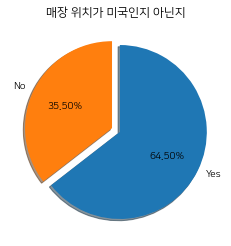

In [97]:
cnt = data["US"].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = "%.2f%%", startangle = 90, counterclock=False, explode = [0.05, 0.05], shadow=True)

plt.title("매장 위치가 미국인지 아닌지")
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 매장이 미국에 있는 비율이 약 64%으로 국내에 위치한 비율이 높은 편임

8) 추가 분석해 볼 사항이 있나요?

> - 국내와 국외에 따라 판매가나 판매량 비교